# 
# 1. 실습을 위한 KT AIDU 환경변수 설정

In [ ]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

##### AIDU 라이브러리 임포트

In [ ]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm

aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

In [ ]:
##### AIDU 디렉토리 환경변수

- data 경로:         aidu_framework.config.data_dir

In [ ]:
# aidu_framework.config.data_dir 내용 확인
aidu_framework.config.data_dir

# 
# 2. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### cust_data.csv 파일 컬럼명
+ 고객등급(class), 성별(sex), 나이(age), 사용서비스수(service), 서비스중지여부 (stop), 미납여부(npay)
+ 3개월 평균 요금(avg_bill), A서비스 3개월 평균요금(A_bill), B서비스 3개월 평균요금(B_bill), 해지여부(termination)

##### <font color=blue> **[문제] 같은 폴더내에 있는 cust_data.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [2]:
# 읽어 들일 파일명 : cust_data.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장


df = pd.read_csv('cust_data.csv')

## ③ 데이터 분석

In [3]:
# 12컬럼, 7814 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [4]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


<AxesSubplot:>

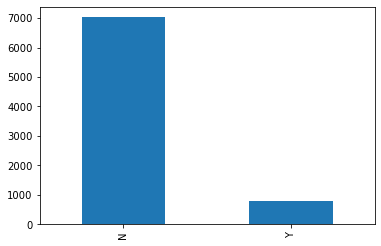

In [4]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [5]:
# Object 컬럼 리스트 정의
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

##### <font color=blue> **[문제] ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating'] 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [6]:
# ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating'] : cal_cols 변수에 대해 One-Hot-Endcoding 수행
# One-Hot-Endcoding 수행 : pandas get_dummies() 함수 이용
# get_dummies() 함수 옵션 : data=df, columns=cal_cols, drop_first=True
# 결과 : df1 저장



df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [7]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

## ⑤ Train, Test  데이터셋 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [11]:
X_train.shape

(5469, 18)

In [12]:
y_train.shape

(5469,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [13]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train[:2]

array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
        0.6       , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

+ 모델 입력갯수, 출력갯수 확인

#### 
## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

#### 
### A. 이진분류 DNN모델 구성 

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

#### 
### 라이브러리 임포트

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 18개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류


model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 
### 모델 확인

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


#### 
### 모델 컴파일 – 이진 분류 모델

In [20]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
```python
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
```

<br>

#### 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
```python
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
```

#### 모델 컴파일 – 예측 모델
```python
model.compile(optimizer='adam', loss='mse')
```

#### 
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

#### 
### 과적합 방지 모델 확인

In [21]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 76        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


#### 
### 모델 컴파일 – 이진 분류 모델

In [23]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 20번
+ batch_size : 16번

In [24]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 20번
### batch_size 16번


history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 [==============================] - 1s 1ms/step - loss: 0.4529 - accuracy: 0.8996 - val_loss: 0.3212 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 0s 911us/step - loss: 0.3440 - accuracy: 0.8996 - val_loss: 0.2983 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 0s 916us/step - loss: 0.3227 - accuracy: 0.8996 - val_loss: 0.2823 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 0s 908us/step - loss: 0.3069 - accuracy: 0.8996 - val_loss: 0.2718 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 0s 883us/step - loss: 0.2930 - accuracy: 0.8996 - val_loss: 0.2640 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 0s 978us/step - loss: 0.2806 - accuracy: 0.8996 - val_loss: 0.2564 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 0s 972us/step - loss: 0.2735 - accuracy: 0.8996 - val_loss: 0.2474 - val_accuracy: 0

#### 
### B. 다중 분류 DNN 구성
+ 18개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [25]:
# 18개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

#### 
### 모델 확인

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 95        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


#### 
### 모델 컴파일 – 다중 분류 모델

In [27]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

#### 
### 모델 학습

In [28]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 [==============================] - 1s 1ms/step - loss: 0.4173 - accuracy: 0.8632 - val_loss: 0.2899 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 0s 981us/step - loss: 0.3283 - accuracy: 0.8996 - val_loss: 0.2747 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 0s 961us/step - loss: 0.3028 - accuracy: 0.8996 - val_loss: 0.2620 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 0s 813us/step - loss: 0.2830 - accuracy: 0.8996 - val_loss: 0.2502 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 0s 912us/step - loss: 0.2684 - accuracy: 0.8996 - val_loss: 0.2392 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.8996 - val_loss: 0.2264 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8996 - val_loss: 0.2142 - val_accuracy: 0.899

#### 
### 모델 성능 평가

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.417330,0.863229,0.289885,0.89936
1,0.328322,0.899616,0.274703,0.89936
2,0.302834,0.899616,0.262035,0.89936
3,0.283037,0.899616,0.250228,0.89936
4,0.268358,0.899616,0.239164,0.89936


+ 성능 시각화

<AxesSubplot:>

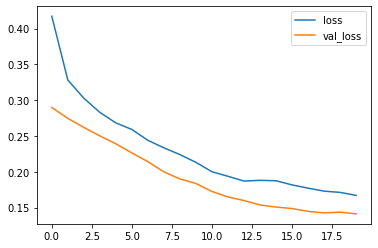

In [31]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

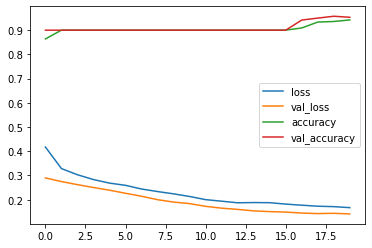

In [32]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

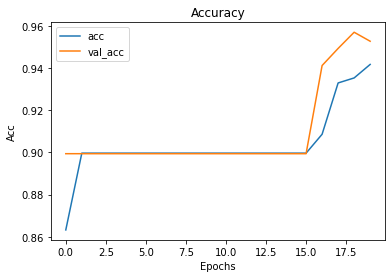

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### 
### Callback : 조기종료, 모델 저장

In [65]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [67]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', 
#                           verbose=1, patience=5)

In [69]:
#check_point = ModelCheckpoint('best_model.h5', verbose=1,
#                             monitor='val_loss', mode='min', 
#                              save_best_only=True)

## 
## 배운 내용 정리
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델